<img src="https://d1vwxdpzbgdqj.cloudfront.net/s3-public-images/learning-partners/greatlearning-brand.png" style="float:right;" width=25%></img>

### The following is the description of the dataset that we are going to use for Two Way ANOVA.


<img src="https://albertapressleader.ca/wp-content/uploads/2020/12/kidney-dialysis.jpg" width = 45%></img>

### Problem Statement:

The dose for effective dialysis depends on duration of treatment and weight gain between treatments. To study the effects of these two factors on the number of days hospitalized attributable to kidney failure, a random sample of 10 patients per group undergone treatment in a large dialysis facility was obtained. Treatment duration was at 3 levels: short, mid and long. Average weight gain between treatments during the year was categorized into three levels: mild, moderate and severe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import anova_lm 

In [2]:
df = pd.read_csv('Dialysis1.csv')

In [3]:
df.head()

,Duration,Weight_Gain,Patient,Days
0,1,1,1,5
1,1,1,2,2
2,1,1,3,2
3,1,1,4,3
4,1,1,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Duration     90 non-null     int64
 1   Weight_Gain  90 non-null     int64
 2   Patient      90 non-null     int64
 3   Days         90 non-null     int64
dtypes: int64(4)
memory usage: 2.9 KB


In [5]:
df['Weight_Gain'].value_counts()

1    30
2    30
3    30
Name: Weight_Gain, dtype: int64

In [6]:
df['Weight_Gain'].replace(to_replace=1, value='mild', inplace=True)
df['Weight_Gain'].replace(to_replace=2, value='moderate', inplace=True)
df['Weight_Gain'].replace(to_replace=3, value='severe', inplace=True)

In [7]:
df['Duration'].replace(to_replace=1, value='short', inplace=True)
df['Duration'].replace(to_replace=2, value='mid', inplace=True)
df['Duration'].replace(to_replace=3, value='long', inplace=True)

In [8]:
df['Duration'].value_counts()

mid      30
long     30
short    30
Name: Duration, dtype: int64

In [9]:
df.Days.describe()

count    90.000000
mean      9.077778
std       4.248537
min       1.000000
25%       6.000000
50%       8.000000
75%      13.000000
max      18.000000
Name: Days, dtype: float64

In [10]:
df.groupby('Weight_Gain')['Days'].mean()

Weight_Gain
mild         8.366667
moderate     8.433333
severe      10.433333
Name: Days, dtype: float64

<AxesSubplot:xlabel='Days', ylabel='Count'>

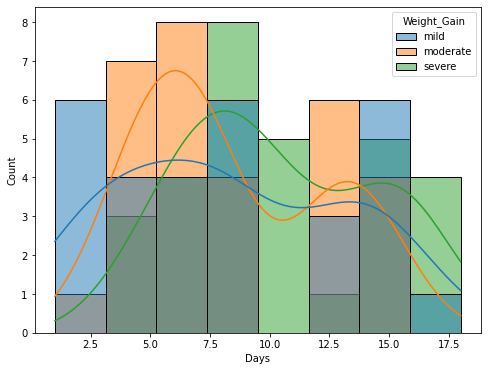

In [11]:
plt.subplots(figsize=(8,6))
sns.histplot(x='Days', hue='Weight_Gain', kde=True, data=df)

In [12]:
df.groupby('Duration')['Days'].mean()

Duration
long     14.266667
mid       8.066667
short     4.900000
Name: Days, dtype: float64

<AxesSubplot:xlabel='Days', ylabel='Count'>

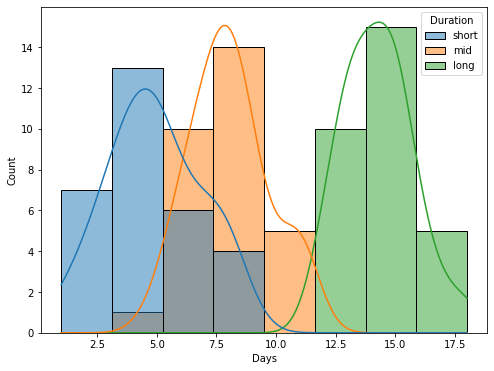

In [13]:
plt.subplots(figsize=(8,6))
sns.histplot(x='Days', hue='Duration', kde=True, data=df)

In [14]:
pd.crosstab(df['Weight_Gain'],df['Duration'],values=df['Days'], aggfunc='mean' )

Duration,long,mid,short
Weight_Gain,,,
mild,14.1,7.8,3.2
moderate,13.4,6.9,5.0
severe,15.3,9.5,6.5


<AxesSubplot:xlabel='Weight_Gain', ylabel='Days'>

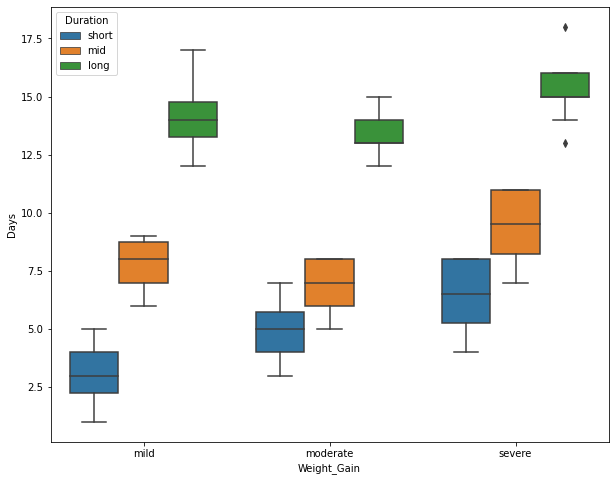

In [15]:
plt.subplots(figsize=(10,8))
sns.boxplot(x='Weight_Gain', y='Days', hue='Duration', data=df)

### Check Assumptions

In [16]:
df1 = df[(df['Weight_Gain'] == 'mild') & (df['Duration'] == 'long')]
df2 = df[(df['Weight_Gain'] == 'moderate') & (df['Duration'] == 'long')]
df3 = df[(df['Weight_Gain'] == 'severe') & (df['Duration'] == 'long')]
df4 = df[(df['Weight_Gain'] == 'mild') & (df['Duration'] == 'mid')]
df5 = df[(df['Weight_Gain'] == 'moderate') & (df['Duration'] == 'mid')]
df6 = df[(df['Weight_Gain'] == 'severe') & (df['Duration'] == 'mid')]
df7 = df[(df['Weight_Gain'] == 'mild') & (df['Duration'] == 'short')]
df8 = df[(df['Weight_Gain'] == 'moderate') & (df['Duration'] == 'short')]
df9 = df[(df['Weight_Gain'] == 'severe') & (df['Duration'] == 'short')]

In [17]:
import scipy.stats as stats

In [18]:
#  The Shapiro-Wilk normality test carried out within each group
print(stats.shapiro(df1['Days']))
print(stats.shapiro(df2['Days']))
print(stats.shapiro(df3['Days']))
print(stats.shapiro(df4['Days']))
print(stats.shapiro(df5['Days']))
print(stats.shapiro(df6['Days']))
print(stats.shapiro(df7['Days']))
print(stats.shapiro(df8['Days']))
print(stats.shapiro(df9['Days'])) # Check this for all subset dataframes

ShapiroResult(statistic=0.9256626963615417, pvalue=0.40660929679870605)
ShapiroResult(statistic=0.8916546702384949, pvalue=0.17699755728244781)
ShapiroResult(statistic=0.9271933436393738, pvalue=0.42086061835289)
ShapiroResult(statistic=0.8946099281311035, pvalue=0.19098953902721405)
ShapiroResult(statistic=0.8553236126899719, pvalue=0.06718955934047699)
ShapiroResult(statistic=0.8647897243499756, pvalue=0.08687927573919296)
ShapiroResult(statistic=0.9419143199920654, pvalue=0.5745048522949219)
ShapiroResult(statistic=0.918366551399231, pvalue=0.34353265166282654)
ShapiroResult(statistic=0.8647897243499756, pvalue=0.08687927573919296)


As p value for all groups is > 0.05, we fail to reject null hypothesis. Hence, each group follows a normal distribution

In [19]:
#The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
#alpha = 0.05
stats.levene(df1['Days'], df2['Days'], df3['Days'], df4['Days'], df5['Days'], 
             df6['Days'], df6['Days'], df8['Days'], df9['Days'])

LeveneResult(statistic=0.81423982869379, pvalue=0.5921296097101791)

As p value > 0.05 we fail to reject null hypothesis, i.e. each group has equal variances

**Let us now perform the Two Way ANOVA. We will now analyse the effect of both the treatments on the 'Days' variable.**

One Way ANOVA with Weight Gain

In [20]:
formula = 'Days ~ C(Weight_Gain)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Weight_Gain),2.0,82.755556,41.377778,2.362582,0.100193
Residual,87.0,1523.700000,17.513793,NaN,NaN


One Way ANOVA with Duration

In [21]:
formula = 'Days ~ C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Duration),2.0,1362.022222,681.011111,242.389063,2.689612e-36
Residual,87.0,244.433333,2.809579,NaN,NaN


Two Way ANOVA without interaction

In [22]:
formula = 'Days ~ C(Weight_Gain)+C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Weight_Gain),2.0,82.755556,41.377778,21.753831,2.348663e-08
C(Duration),2.0,1362.022222,681.011111,358.032781,3.930173e-42
Residual,85.0,161.677778,1.902092,NaN,NaN


Both factors have low p-values (less than 0.05), so the mean number of the days are not the same across both Weight_Gain and Duration. 
Duration is the more significant factor (lower p-value). 

**Let us check whether there is any interaction effect between the treatments.**

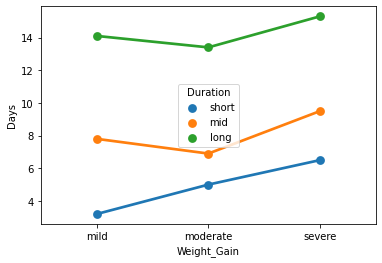

In [23]:
sns.pointplot(x='Weight_Gain', y='Days', data=df, hue='Duration',ci=None);

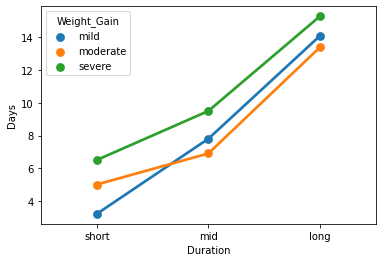

In [24]:
sns.pointplot(x='Duration', y='Days', data=df, hue='Weight_Gain',ci=None);

**Still, we can see that there is some sort of interaction between the two treatments. So, we will introduce a new term while performing the Two Way ANOVA.**

In [25]:
formula = 'Days ~ C(Weight_Gain) + C(Duration) + C(Weight_Gain):C(Duration)'
#formula = 'Days ~ C(Weight_Gain) * C(Duration)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Weight_Gain),2.0,82.755556,41.377778,24.553846,4.617138e-09
C(Duration),2.0,1362.022222,681.011111,404.116484,7.219602e-43
C(Weight_Gain):C(Duration),4.0,25.177778,6.294444,3.735165,7.696131e-03
Residual,81.0,136.500000,1.685185,NaN,NaN


Significant interaction effect

#### Honest significant difference (tukeyhsd)

In [26]:
df['WgDu'] = df['Weight_Gain']+':'+ df['Duration']

In [27]:
df.head()

,Duration,Weight_Gain,Patient,Days,WgDu
0,short,mild,1,5,mild:short
1,short,mild,2,2,mild:short
2,short,mild,3,2,mild:short
3,short,mild,4,3,mild:short
4,short,mild,5,4,mild:short


In [28]:
df['WgDu'].value_counts()

moderate:short    10
moderate:mid      10
mild:short        10
severe:long       10
severe:short      10
mild:long         10
moderate:long     10
mild:mid          10
severe:mid        10
Name: WgDu, dtype: int64

In [29]:
from statsmodels.stats.multicomp import MultiComparison

In [30]:
mcomp = MultiComparison(df['Days'], df['WgDu'])
print(mcomp.tukeyhsd().summary())

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------
     mild:long       mild:mid     -6.3  0.001  -8.1502 -4.4498   True
     mild:long     mild:short    -10.9  0.001 -12.7502 -9.0498   True
     mild:long  moderate:long     -0.7    0.9  -2.5502  1.1502  False
     mild:long   moderate:mid     -7.2  0.001  -9.0502 -5.3498   True
     mild:long moderate:short     -9.1  0.001 -10.9502 -7.2498   True
     mild:long    severe:long      1.2  0.502  -0.6502  3.0502  False
     mild:long     severe:mid     -4.6  0.001  -6.4502 -2.7498   True
     mild:long   severe:short     -7.6  0.001  -9.4502 -5.7498   True
      mild:mid     mild:short     -4.6  0.001  -6.4502 -2.7498   True
      mild:mid  moderate:long      5.6  0.001   3.7498  7.4502   True
      mild:mid   moderate:mid     -0.9 0.8067  -2.7502  0.9502  False
      mild:mid moder

                                            ------ Happy Learning------